<a href="https://colab.research.google.com/github/filipabramowicz/ML_AI_course/blob/main/lab_01_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



       Data  Pobór 2022  Oddanie 2022
0   2021-01         NaN           NaN
1   2021-02    164123.0      149642.0
2   2021-03    404258.0      403571.0
3   2021-04    340238.0      456505.0
4   2021-05    299844.0      638308.0
5   2021-06    300864.0      764947.0
6   2021-07    252642.0      624512.0
7   2021-08    352505.0      503572.0
8   2021-09    350113.0      454616.0
9   2021-10    365076.0       47495.0
10  2021-11     51238.0      161191.0
11  2021-12    554984.0       57625.0
12  2022-01         0.0      103202.0
13  2022-02         0.0        7187.0



       Data  Pobór 2022  Oddanie 2022  nadmiar poboru  nadmiar oddania  \
0   2021-01         NaN           NaN             NaN              NaN   
1   2021-02    164123.0      119713.6         44409.4              0.0   
2   2021-03    404258.0      322856.8         81401.2              0.0   

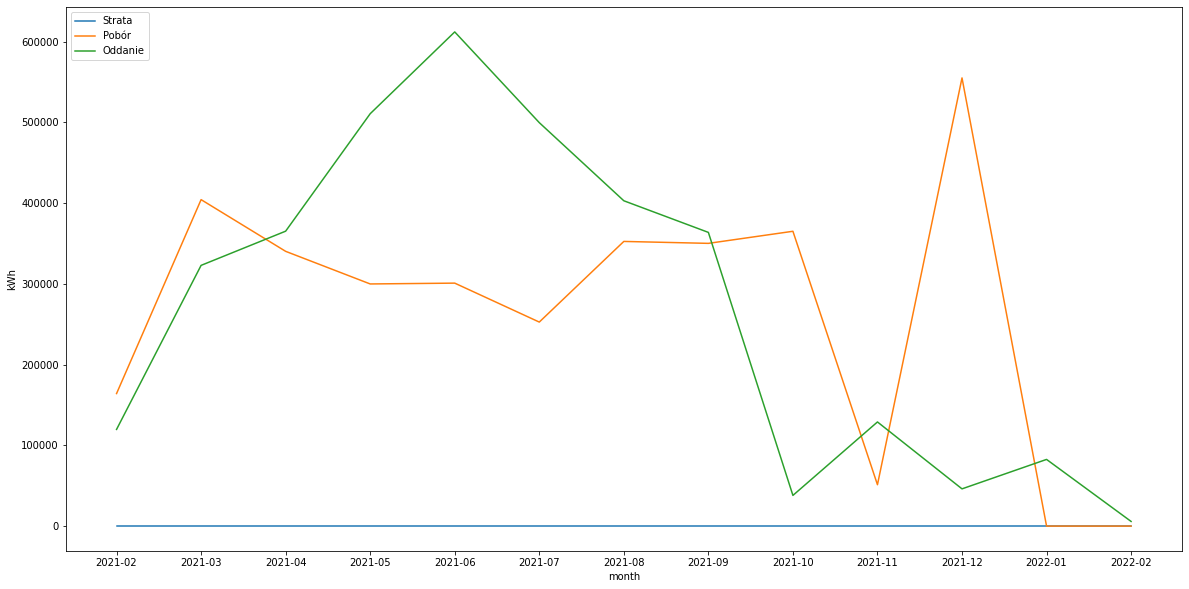

In [49]:
# Mount drive and load data from csv file
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

drive.mount('/content/drive')
path = "/content/drive/MyDrive/data/tauron-2022_01.csv"
energy_data = pd.read_csv(path, sep=";", thousands=',')
print('\n\n')
#print(energy_data)

# Seems that there is additional semicolon at the end of each line,
# which is read as third column, let's drop third column
energy_data = energy_data.iloc[:, : -1]


print(energy_data)
print('\n\n')

# Only 80% of energy given back to the grid can be used for free
energy_data['Oddanie 2022'] = 0.8 * energy_data['Oddanie 2022']

# Calculate the differences between energy taken from grid and given to the grid
# Replace negative values with 0s
energy_data['nadmiar poboru'] = energy_data['Pobór 2022'] - energy_data['Oddanie 2022']
energy_data['nadmiar poboru'] = energy_data['nadmiar poboru'].mask(energy_data['nadmiar poboru'].lt(0),0)
energy_data['nadmiar oddania'] = energy_data['Oddanie 2022'] - energy_data['Pobór 2022']
energy_data['nadmiar oddania'] = energy_data['nadmiar oddania'].mask(energy_data['nadmiar oddania'].lt(0),0)

# Calculate cummulative energy given back to the grid (from last 12 months)
energy_data['skumulowany nadmiar oddania 12mcy'] = energy_data['nadmiar oddania'].rolling(min_periods=1, window=12).sum()
energy_data['skumulowany nadmiar oddania'] = energy_data['nadmiar oddania'].cumsum()
energy_data['strata'] = energy_data['skumulowany nadmiar oddania 12mcy'] - energy_data['skumulowany nadmiar oddania']

#print(energy_data)

# Make a plot
dates = energy_data['Data']
energy_in = energy_data['Pobór 2022']
energy_out = energy_data['Oddanie 2022']
loss = energy_data['strata']

plt.figure(figsize=(20,10))
plt.plot(dates, loss, label='Strata')
plt.plot(dates, energy_in, label='Pobór')
plt.plot(dates, energy_out, label= 'Oddanie')
plt.legend(loc="upper left")
plt.title('')
plt.xlabel('month')
plt.ylabel('kWh')
plt.show()